# Perkenalan 

**Nama: Muhamad Fikri Mumtaz**

**Batch: HCK-004**

----

Background Statement:

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

Problem Statement:

Memprediksi Customer yang akan berhenti (churn) menggunakan Deep Learning ANN

----

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer

#For Deep Learning
import tensorflow as tf
from keras.callbacks import EarlyStopping

#For Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Save Model
import joblib

----

# Data Loading

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("h8dsft_P2M1_Muhamad_Fikri_Mumtaz.csv")
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [5]:
df.head(20)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.930000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.220000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.040000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.490000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.430000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.000000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.933920,No,Yes,No,Not Applicable,Too many ads,1


Deskripsi Data:

user_id = ID of a customer

age = Age of a customer

gender = Gender of a customer

region_category = Region that a customer belongs to

membership_category = Category of the membership that a customer is using

joining_date = Date when a customer became a member

joining_through_referral = Whether a customer joined using any referral code or ID

preferred_offer_type = 	Type of offer that a customer prefers

medium_of_operation = 	Medium of operation that a customer uses for transactions

internet_option = 	Type of internet service a customer uses

last_visit_time = 	The last time a customer visited the website

days_since_last_login = 	Number of days since a customer last logged into the website

avg_time_spent = Average time spent by a customer on the website

avg_transaction_value = 	Average transaction value of a customer

avg_frequency_login_days = 	Number of times a customer has logged in to the website

points_in_wallet = Points awarded to a customer on each transaction

used_special_discount = 	Whether a customer uses special discounts offered

offer_application_preference = Whether a customer prefers offers

past_complain = Whether a customer has raised any complaints

complaint_status = 	Whether the complaints raised by a customer was resolved

feedback = Feedback provided by a customer

churn_risk_score = Churn score when 0 is Not Churn, 1 = is Churn.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [7]:
df.isna().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Terdapat missing value

In [8]:
df.duplicated().sum()

18

terdapat data terduplikasi

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

data sudah tidak terduplikasi

In [11]:
#persentase missing values
missing_percentage = df.isna().mean() * 100

# Tampilkan hasilnya dengan hanya menampilkan kolom dengan nilai yang lebih besar dari 0
print(missing_percentage[missing_percentage > 0])

gender                      0.159494
region_category            14.673443
joined_through_referral    14.700476
preferred_offer_types       0.778547
medium_of_operation        14.578828
dtype: float64


Berdasarkan pengamatan dari dataset ini missing value terjadi karena kemungkinan besar user dengan sengaja mengosongkan data tersebut. karena sebagian besar missing value adalah berasal dari informasi pribadi yang untuk sebagian orang merupakan data sensitif yang tidak mau untuk diisi. Sehingga untuk kasus ini missing value pada dataset adalah MNAR (Missing Not At Random).

Untuk menghandle missing value karena jumlah data yang hilang terlalu banyak dan kolom tersebut juga merupakan kolom yang vital, maka handling missing value yang dilakukan adalah dengan cara simple imputer.

In [12]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Terdapat anomaly pada kolom "days_since_last_login" dimana jumlah hari sejak terakhir log in berada dibawah 0 yang dimana hal tersebut tidak mungkin terjadi. Oleh sebab itu saya ubah value tersebut ke angka 12 (median).

In [13]:
df[(df["days_since_last_login"] < 0)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
56,846e5d098ccea5d0,11,M,Village,Gold Membership,2017-08-01,NaN,Gift Vouchers/Coupons,Smartphone,Mobile_Data,02:49:31,-999,208.89,11876.12,26.0,666.79000,Yes,No,No,Not Applicable,Poor Product Quality,1
71,93415f6df1dfb2fc,51,F,Town,Basic Membership,2015-12-02,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,00:00:25,-999,30.76,49293.08,8.0,653.61000,No,Yes,No,Not Applicable,Poor Website,1
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,23:32:55,-999,68.82,28467.12,0.0,0.00000,Yes,No,No,Not Applicable,Poor Customer Service,1
119,8815dc1a2f57e42e,24,F,City,Basic Membership,2017-07-24,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,06:37:14,-999,105.40,19189.84,0.0,0.00000,Yes,No,Yes,Solved,Poor Website,1
120,b30748c2a4f4ade9,46,M,City,No Membership,2017-11-13,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,09:00:13,-999,101.01,27353.61,0.0,372.36373,Yes,No,Yes,Unsolved,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36952,8f0f8a44fe390347,40,M,City,Basic Membership,2016-03-24,No,Without Offers,Desktop,Wi-Fi,18:53:26,-999,57.77,30897.25,5.0,849.32639,No,Yes,Yes,Unsolved,Poor Product Quality,1
36965,81e8bfde0968fcb4,56,F,City,Premium Membership,2016-02-11,NaN,Gift Vouchers/Coupons,Desktop,Wi-Fi,04:50:15,-999,191.65,89666.75,4.0,848.73000,Yes,No,No,Not Applicable,Quality Customer Care,0
36973,b48a8082ff2b932e,59,M,Town,Platinum Membership,2015-06-24,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,02:21:58,-999,32.95,17350.38,10.0,746.45000,Yes,No,No,Not Applicable,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:47:24,-999,831.49,37021.18,25.0,751.48000,No,Yes,Yes,No Information Available,Poor Website,0


In [14]:
new_column = []  # create a new list to store the updated values

for val in df['days_since_last_login']:
    if val < 0:
        new_val = 12
    else:
        new_val = val
    new_column.append(new_val)
df['days_since_last_login'] = new_column

In [15]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.717561,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,5.422649,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,9.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


data kolom `days_since_last_login` sudah terlihat normal

In [16]:
# Melihat Statistik Kategorikal
df.describe(include=object)

,user_id,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36933,31564,36992,36992,31554,36704,31599,36992,36992,36992,36992,36992,36992,36992
unique,36992,2,3,6,1096,2,3,3,3,30101,2,2,2,5,9
top,9f420209e7d129f3,F,Town,Basic Membership,2015-06-02,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,18490,14128,7724,55,15839,12349,13913,12413,6,20342,20440,18602,18602,6350


In [17]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [18]:
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'])

merubah kolom diatas karena kolom tersebut merupakan data waktu (datetime)

In [19]:
df.describe(include=object)

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36933,31564,36992,31554,36704,31599,36992,36992,36992,36992,36992,36992
unique,36992,2,3,6,2,3,3,3,2,2,2,5,9
top,9f420209e7d129f3,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,18490,14128,7724,15839,12349,13913,12413,20342,20440,18602,18602,6350


Terlihat bahwa gender terbanyak adalah wanita dengan 18490 user.

lalu town merupakan region dengan user terbanyak.

basic membership merupakan kategori membership terbanyak dengan 7724 user.

Sebanyak 15839 user tidak join dengan referral.

Sebanyak 12349 user memilih gift vouchers/coupons.

Sebanyak 13913 user menggunakan desktop.

sebanyak 12413 user menggunakan Wi-Fi.

sebanyak 20342 user menggunakan diskon spesial mereka.

sebanyak 20440 user memberikan preferensi aplikasi mereka.

sebanyak 18602 user tidak memiliki komplain masa lalu.

Sebanyak 18602 user memiliki status komplain yang tidak bisa diaplikasikan.

sebanyak 6350 user memfeedback `poor product quality`.

# Explanatory Data Analyst

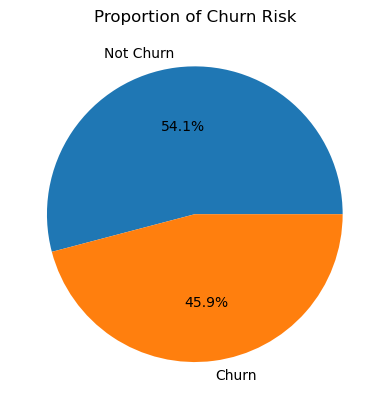

In [20]:
default_counts = df['churn_risk_score'].value_counts()
plt.pie(default_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Proportion of Churn Risk')
plt.show()

Terlihat bahwa proporsi untuk user yang tidak churn lebih besar daripada user yang churn.

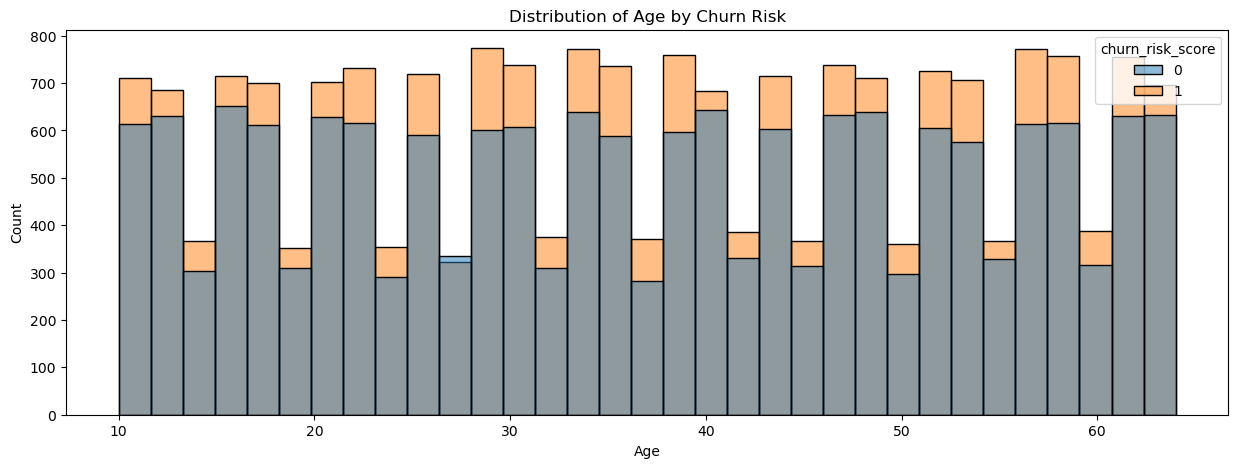

In [21]:
fig, axes = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='age', hue='churn_risk_score', stat='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Churn Risk')
plt.show()

terlihat distribusi umur yang melakukan churn dominan di segala usia mulai dari usia muda hingga lansia.

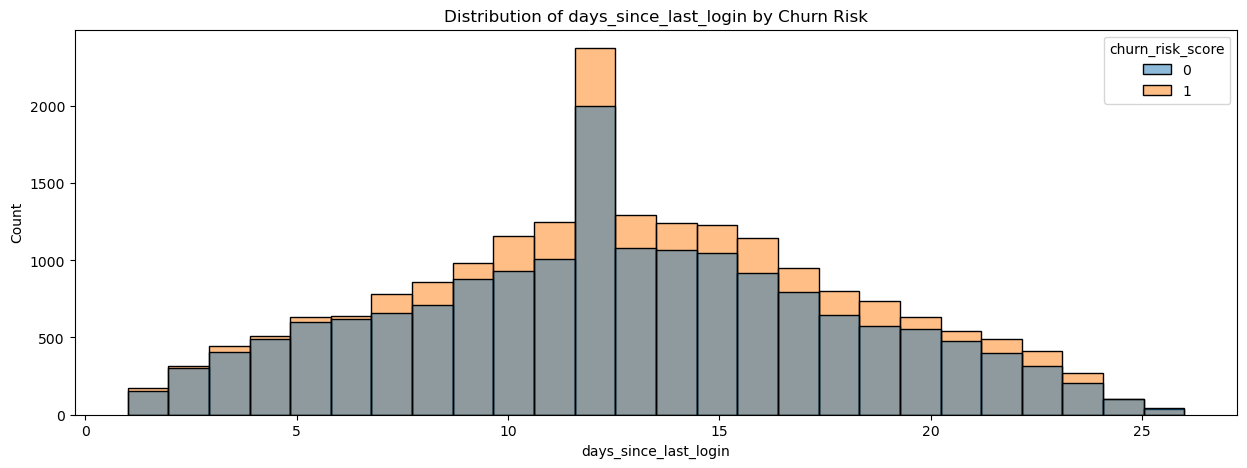

In [22]:
fig, axes = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='days_since_last_login', hue='churn_risk_score', stat='count', bins = 26)
plt.xlabel('days_since_last_login')
plt.ylabel('Count')
plt.title('Distribution of days_since_last_login by Churn Risk')
plt.show()

Terlihat distribusi hari sejak login terakhir dengan rata-rata adalah 12 hari.

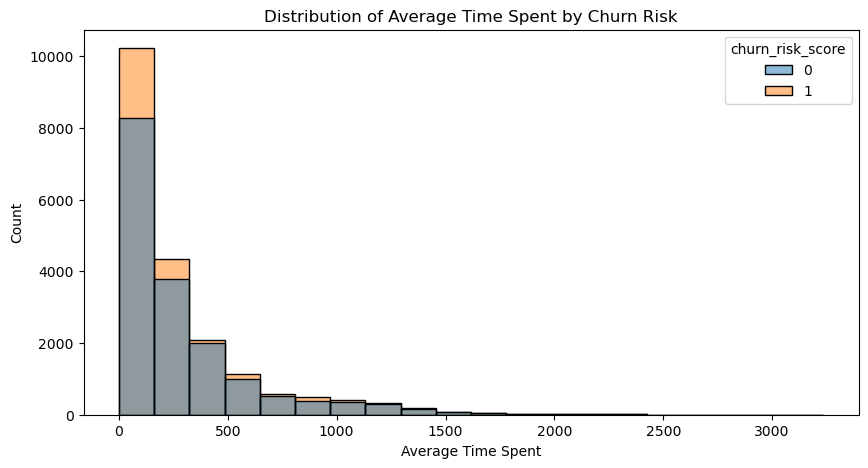

In [23]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='avg_time_spent', hue='churn_risk_score', stat='count', bins = 20)
plt.xlabel('Average Time Spent')
plt.ylabel('Count')
plt.title('Distribution of Average Time Spent by Churn Risk')
plt.show()

Terlihat rata-rata waktu yang terluangkan oleh user adalah 279 menit yang dominan adalah user dengan churn risk 1.

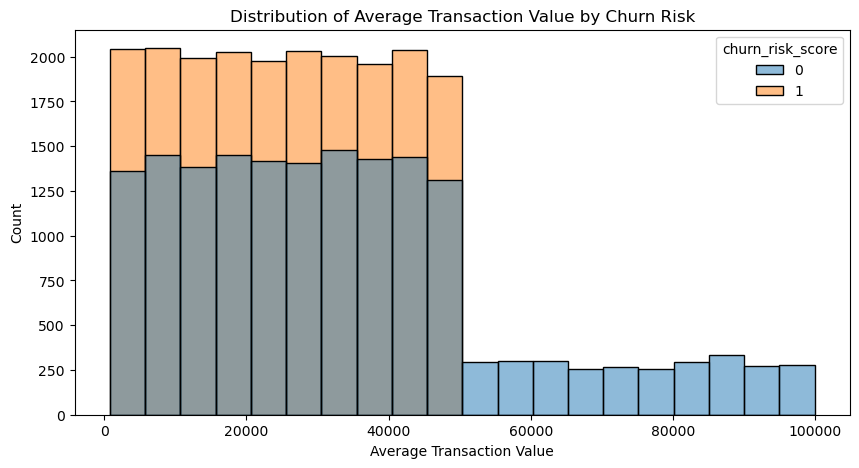

In [24]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='avg_transaction_value', hue='churn_risk_score', stat='count', bins = 20)
plt.xlabel('Average Transaction Value')
plt.ylabel('Count')
plt.title('Distribution of Average Transaction Value by Churn Risk')
plt.show()

Terlihat rata-rata nilai transaksi adalah 29271 yang dimana user dengan rata2 nilai transaksi dibawah 50000 adalah user dengan churn risk 1, sedangkan rata2 nilai transaksi diatas 50000 adalah user dengan churn risk 0.

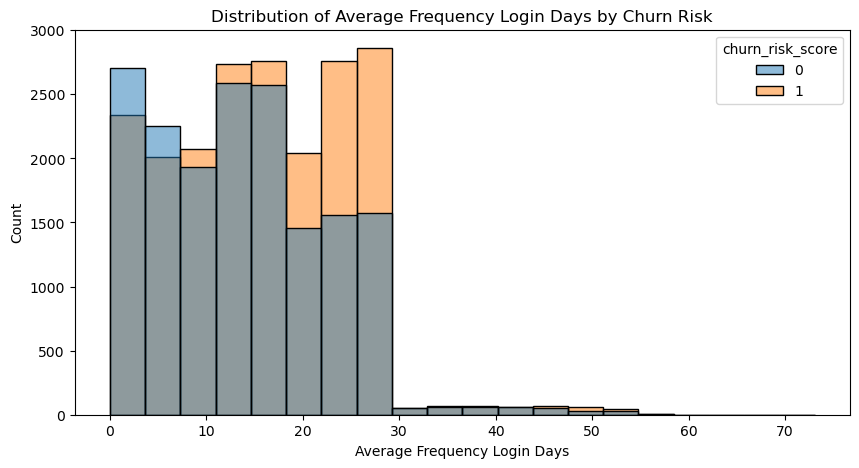

In [25]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='avg_frequency_login_days', hue='churn_risk_score', stat='count', bins = 20)
plt.xlabel('Average Frequency Login Days')
plt.ylabel('Count')
plt.title('Distribution of Average Frequency Login Days by Churn Risk')
plt.show()

rata-rata frekuensi login adalah 14 hari.

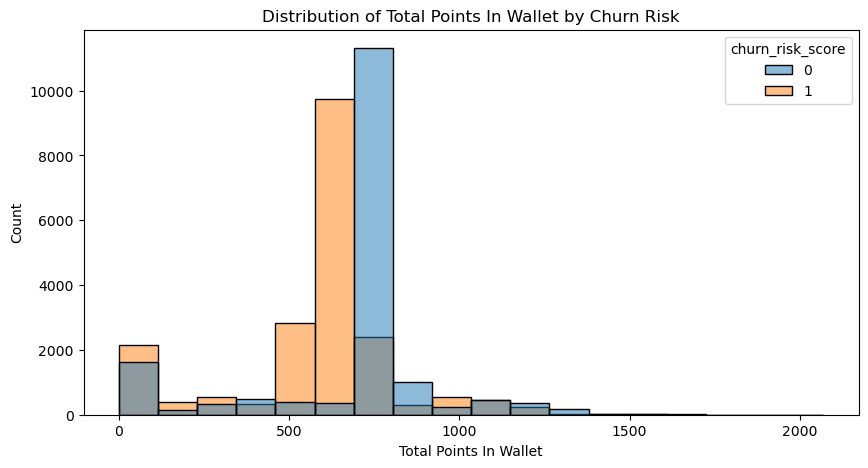

In [26]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x='points_in_wallet', hue='churn_risk_score', stat='count', bins = 18)
plt.xlabel('Total Points In Wallet')
plt.ylabel('Count')
plt.title('Distribution of Total Points In Wallet by Churn Risk')
plt.show()

rata-rata point di wallet adalah 623 point.

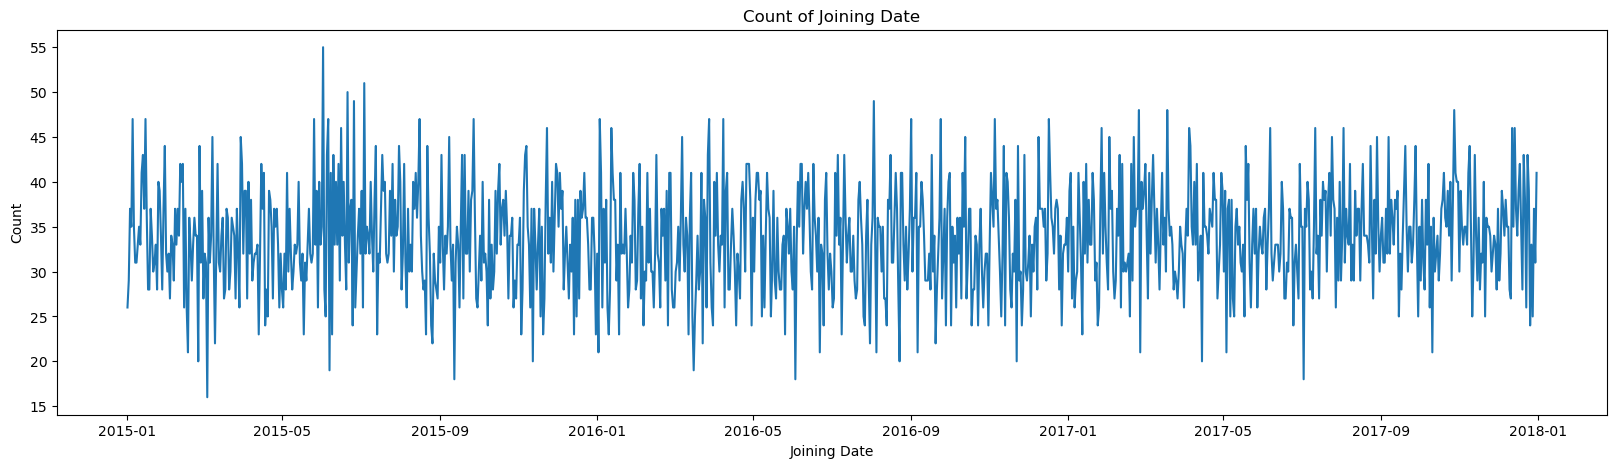

In [34]:
# Group the DataFrame by joining_date and count the number of rows in each group
df_counts = df.groupby(['joining_date']).size().reset_index(name='count')

# Create the lineplot
fig, axes = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_counts, x='joining_date', y='count')
plt.xlabel('Joining Date')
plt.ylabel('Count')
plt.title('Count of Joining Date')
plt.show()

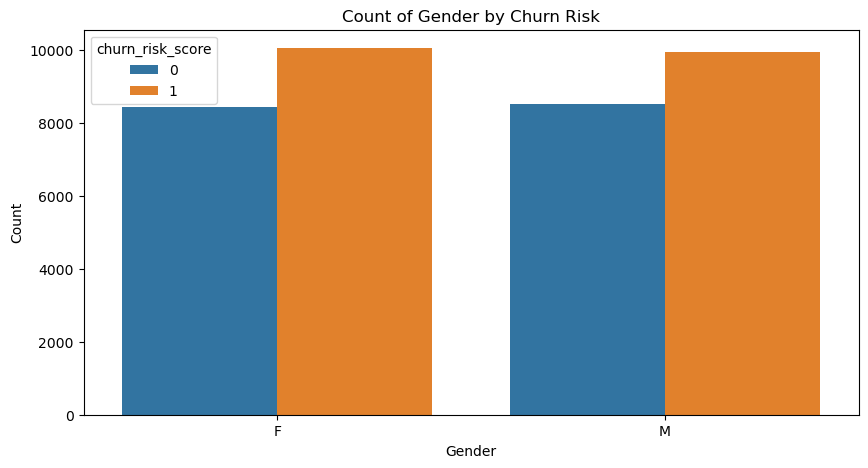

In [27]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='gender', hue='churn_risk_score')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender by Churn Risk')
plt.show()

Jumlah churn risk untuk Pria dan Wanita tidak terlihat perbedaan yang signifikan yang berarti churn risk ini tidak memandang gender.

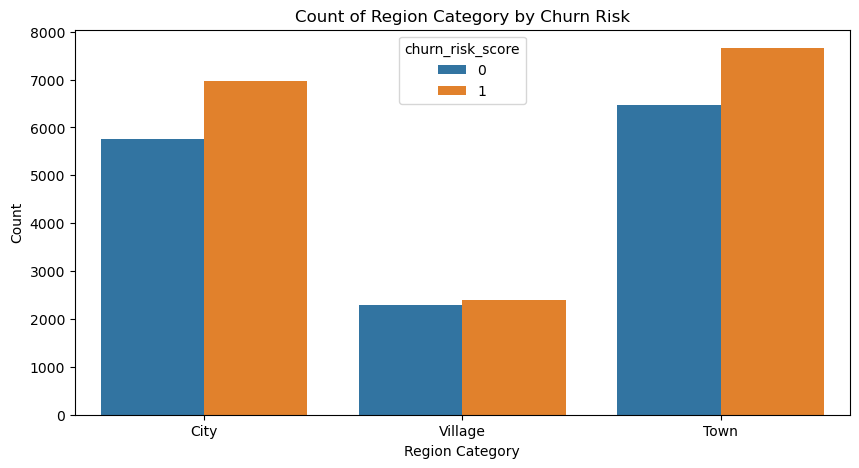

In [28]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='region_category', hue='churn_risk_score')
plt.xlabel('Region Category')
plt.ylabel('Count')
plt.title('Count of Region Category by Churn Risk')
plt.show()

Kota Kecil (Town) memiliki churn risk yang lebih besar daripada lainnya.

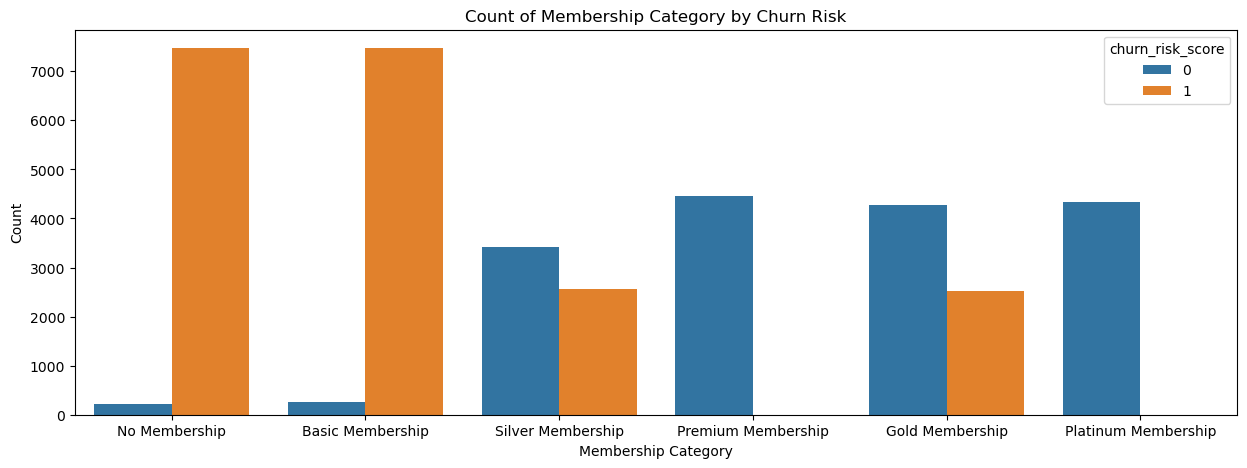

In [29]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.title('Count of Membership Category by Churn Risk')
plt.show()

User yang tidak memiliki membership dan yang hanya basic membership memiliki Churn Risk yang sangat signifikan daripada kategori membership lainnya dan membership platinum merupakan kategori dengan tingkat churn risk yang terkecil atau tidak terdapat churn risk.

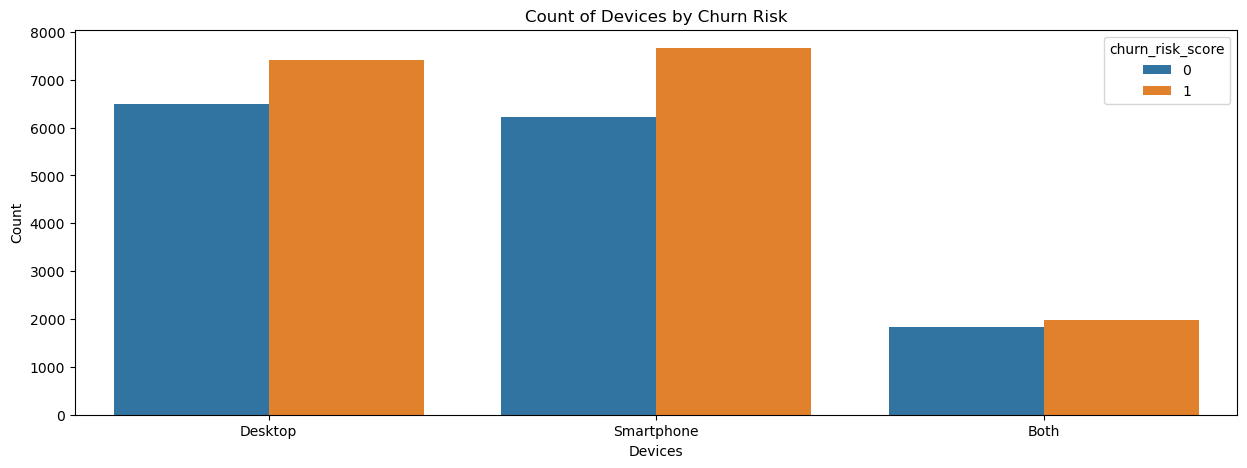

In [30]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='medium_of_operation', hue='churn_risk_score')
plt.xlabel('Devices')
plt.ylabel('Count')
plt.title('Count of Devices by Churn Risk')
plt.show()

User yang menggunakan Smartphone memiliki tingkat Churn Risk yang lebih banyak daripada User dengan perangkat lainnya.

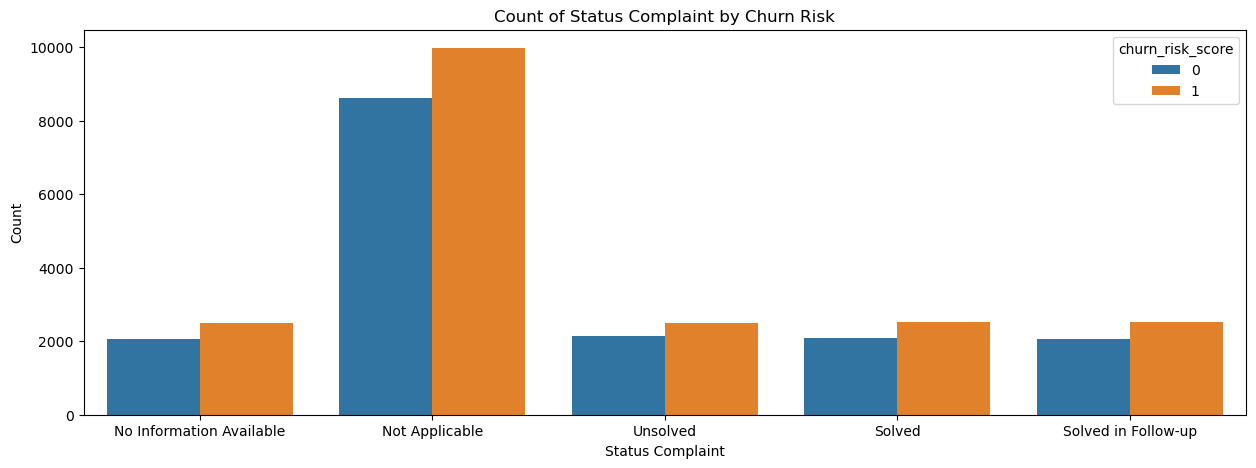

In [31]:
fig, axes = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='complaint_status', hue='churn_risk_score')
plt.xlabel('Status Complaint')
plt.ylabel('Count')
plt.title('Count of Status Complaint by Churn Risk')
plt.show()

Banyak status komplain yang tidak bisa diterapkan, dan banyak status komplain yang tidak bisa diterapkan memiliki Churn Risk yang tinggi.

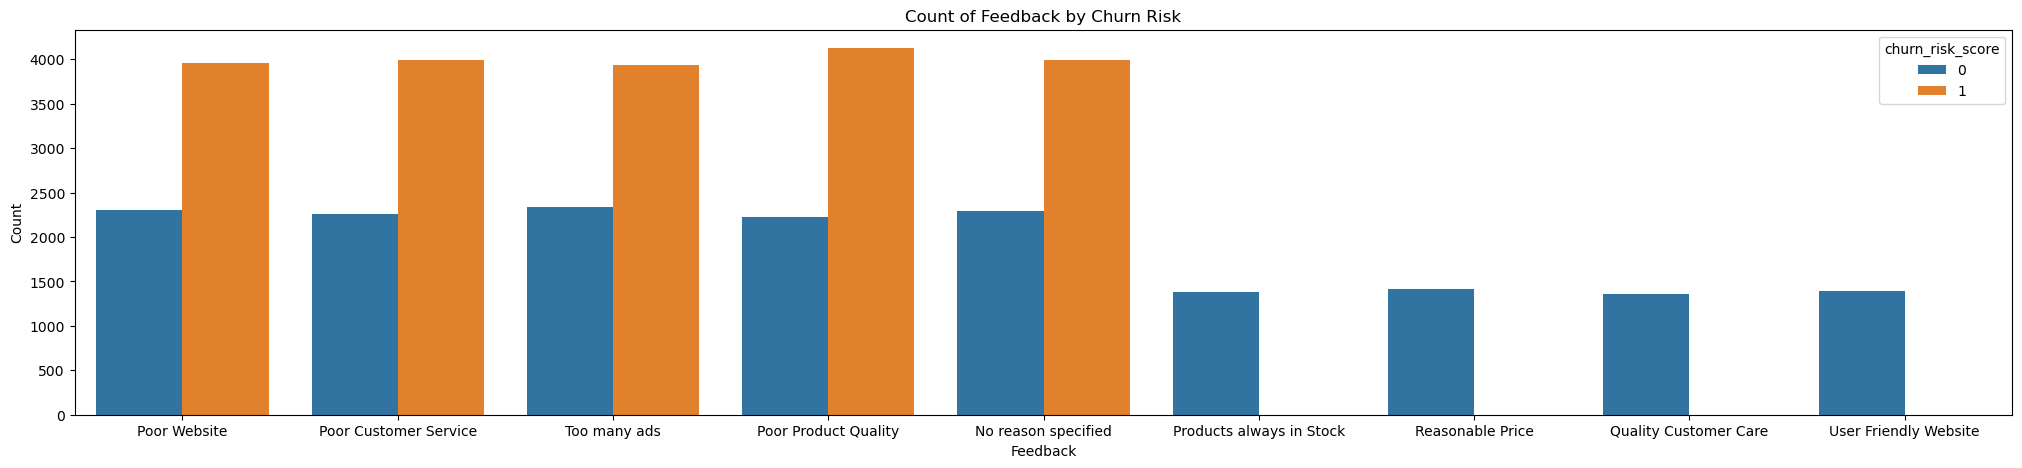

In [32]:
fig, axes = plt.subplots(figsize=(25,5))
sns.countplot(data=df, x='feedback', hue='churn_risk_score')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Count of Feedback by Churn Risk')
plt.show()

Feedback yang negatif selalu memiliki Churn Risk sedangkan Feedback yang positif tidak memiliki Churn Risk.

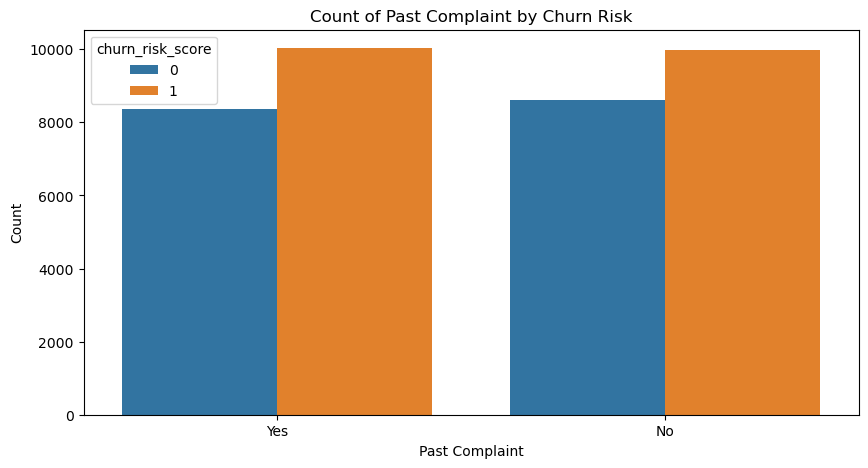

In [33]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='past_complaint', hue='churn_risk_score')
plt.xlabel('Past Complaint')
plt.ylabel('Count')
plt.title('Count of Past Complaint by Churn Risk')
plt.show()

User yang pernah melakukan komplain cenderung memiliki Churn Risk yang lebih tinggi daripada yang tidak pernah komplain sebelumnya.

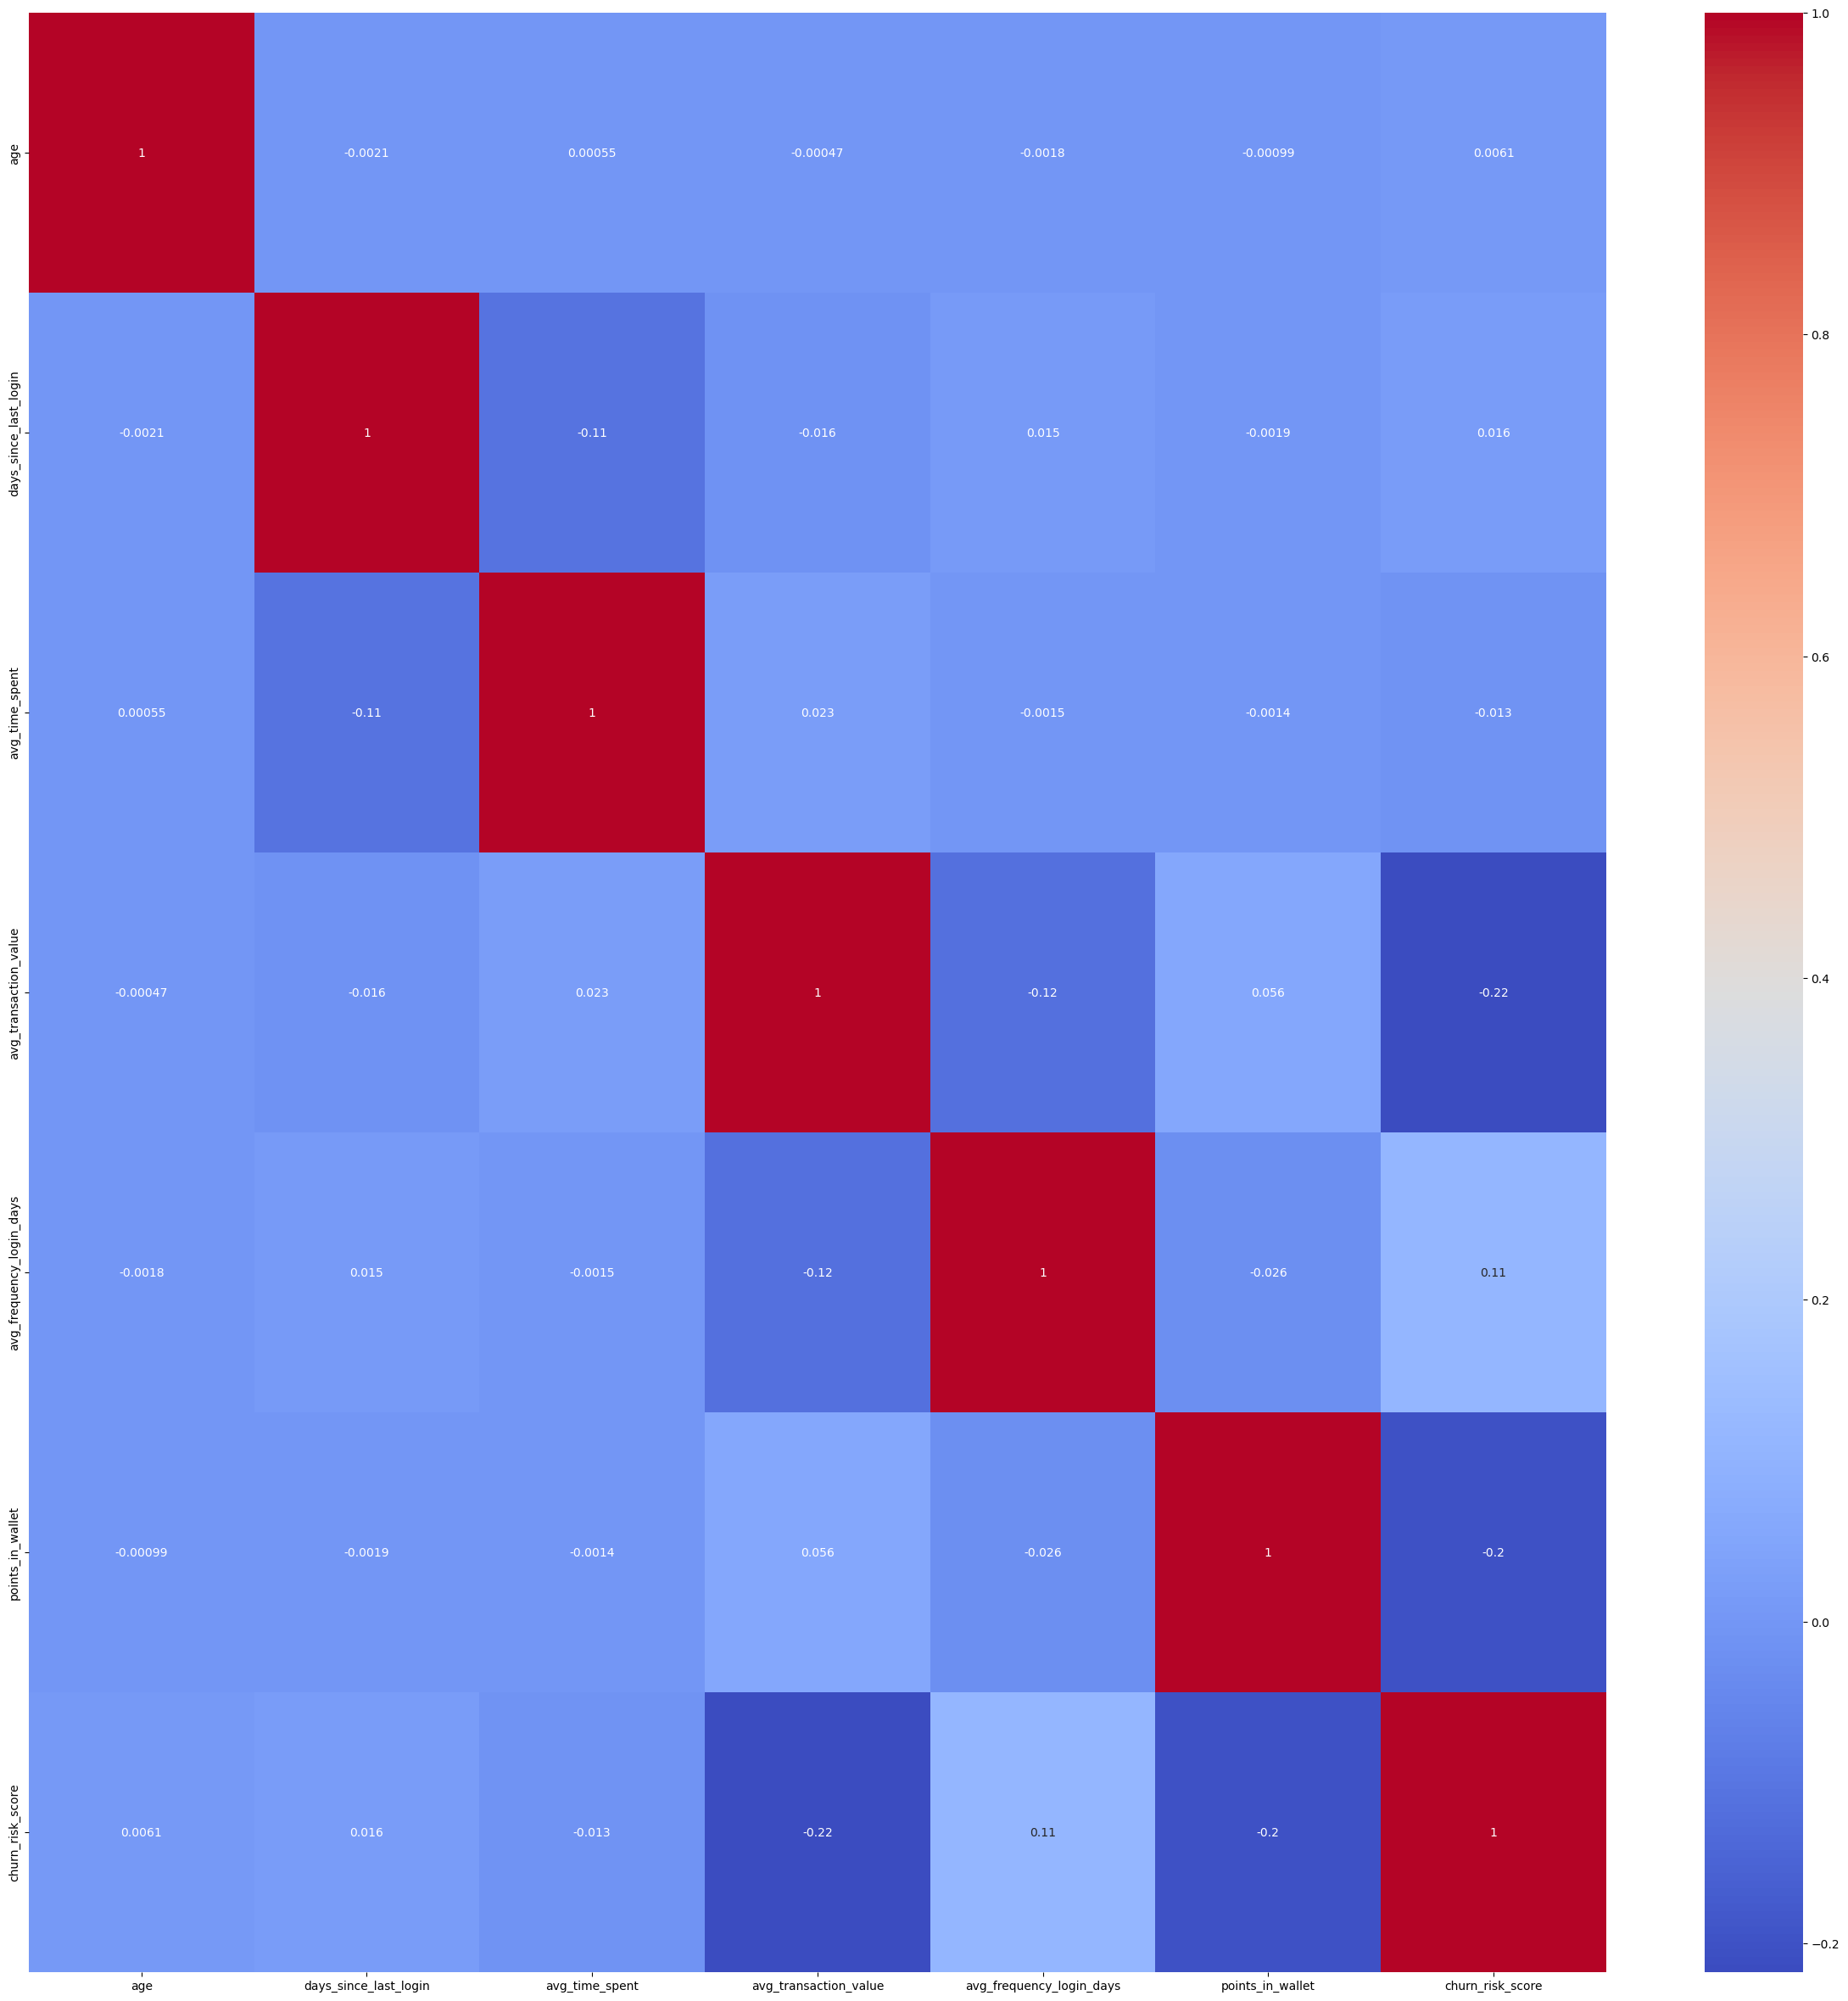

In [79]:
fig, axes = plt.subplots(figsize=(30,30)) #Width, height in inches
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Feature Engineering

In Feature Engineering we will doing a Test and Load with Train, Valid, and Test between X and y.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  datetime64[ns]
 11  days_since_last_login       

In [35]:
df1 = df.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1)

kolom di drop karena merupakan data dengan cardinalitas sangat tinggi dan data time.

In [36]:
num_cols = ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days']
cat_cols_ohe = ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']
cat_cols_ord = ['gender','membership_category','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

melakukan grouping kolom kedalam 3 kelompok

In [37]:
feature= df1.drop('churn_risk_score',axis=1)
target= df1['churn_risk_score']

menggunakan 17 fitur

In [38]:
from sklearn.model_selection import train_test_split
x_train_full, x_test,  y_train_full, y_test = train_test_split(feature,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target,
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                   y_train_full,
                                                   shuffle=True, 
                                                   test_size=0.2, 
                                                   stratify= y_train_full)

### Handling Outlier

Mengidentifikasi outlier

In [39]:
for col in x_train_full[num_cols].columns: 
  skewness = x_train_full[num_cols][col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = x_train_full[num_cols][col].mean() + 3*x_train_full[num_cols][col].std()
    lower = x_train_full[num_cols][col].mean() - 3*x_train_full[num_cols][col].std()
  elif skewness>=-1 and skewness<=1:
    Q1 = x_train_full[num_cols][col].quantile(0.25)
    Q3 = x_train_full[num_cols][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR    
  else:
    Q1 = x_train_full[num_cols][col].quantile(0.25)
    Q3 = x_train_full[num_cols][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 3*IQR
    lower = Q1 - 3*IQR
  
  no_outliers = x_train_full[num_cols][(x_train_full[num_cols][col]>=lower) & (x_train_full[num_cols][col]<=upper)]
  outliers = x_train_full[num_cols][(x_train_full[num_cols][col]<lower) | (x_train_full[num_cols][col]>upper)]

In [40]:
# jumlah outlier
len(outliers)/len(num_cols)

50.8

terlihat jumlah outlier

In [41]:
x_train_full.skew()

age                        -0.009275
days_since_last_login       0.052419
avg_time_spent              2.303890
avg_transaction_value       1.013107
avg_frequency_login_days    0.394323
points_in_wallet           -0.781729
dtype: float64

melihat skewness dari kolom numerik untuk dilakukan scaling.

In [42]:
num_transformer1 = Pipeline([
                    ('wins1', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
                    ('scaling1', StandardScaler())
                    ])
num_transformer2 = Pipeline([
                    ('wins2', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
                    ('scaling2', MinMaxScaler())
                    ])
num_transformer3 = Pipeline([
                    ('wins3', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                    ('scaling3', MinMaxScaler())
                    ])

skaling menggunakan 3 metode yaitu gaussian untuk distribusi normal, iqr 1.5, dan iqr 3.

enkoding menggunakan ordinal enkoding dan OHE.

In [43]:
cat_transformer1 = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[['M', 'F'], ['No Membership', 'Basic Membership','Silver Membership','Gold Membership','Premium Membership','Platinum Membership'],['No','Yes'],['No','Yes'],['No','Yes'],['No','Yes']]))
    ])

In [44]:
cat_transformer2 = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

In [45]:
full_pipeline = ColumnTransformer([
        ("num1", num_transformer1, ['age','days_since_last_login','avg_frequency_login_days']),
        ("num2", num_transformer2, ['points_in_wallet']),
        ("num3", num_transformer3, ['avg_time_spent','avg_transaction_value']),
        ("cat_ord", cat_transformer1, ['gender', 'membership_category','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']),
        ("cat_ohe", cat_transformer2, ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']),
    ])

Melakukan columntransformer untuk semua kolom

Melakukan fit_transform untuk data x train, x_test, dan x_val.

In [46]:
train_x = full_pipeline.fit_transform(x_train_full)
train_x

array([[-0.82893164,  0.05067389, -1.56397383, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.57196316,  0.23528454, -1.56397383, ...,  0.        ,
         1.        ,  0.        ],
       [-0.00757289, -0.13393677,  0.36537574, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.20802029,  0.23528454,  0.79412009, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57620587,  1.52755914, -0.59929904, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.57196316,  0.60450586,  1.00849226, ...,  0.        ,
         1.        ,  0.        ]])

In [47]:
test_x = full_pipeline.transform(x_test)
test_x

array([[-0.26029866, -0.31854743,  1.22286444, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37151576, -0.13393677, -0.27774078, ...,  0.        ,
         1.        ,  0.        ],
       [-0.3234801 , -1.24160071,  0.686934  , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.11878999,  0.60450586, -0.92085731, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37151576,  0.23528454,  0.04381748, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81378585, -0.13393677,  0.04381748, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
train_val = full_pipeline.transform(x_val)
train_val

array([[-1.33438317, -1.24160071, -0.27774078, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89211308, -0.50315808, -0.06336861, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07075433,  1.15833783, -0.49211296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.44560027, -0.31854743,  1.00849226, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62424153,  0.05067389,  0.79412009, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70256875,  1.15833783,  0.15100357, ...,  0.        ,
         0.        ,  0.        ]])

# TensorFlow Pipeline

In [49]:
# Train Program

## First, let's create a training Dataset instance.
train_dataset = tf.data.Dataset.from_tensor_slices((train_x.astype(np.float32), y_train_full.astype(np.int32)))

## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=20000).batch(32)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((test_x.astype(np.float32), y_test.astype(np.int32)))
test_dataset = test_dataset.batch(32)


In [50]:
# Train ANN with Validation Data

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((train_val, y_val))
val_dataset = val_dataset.batch(32)

# ANN Training

Melakukan training pada model ANN

## Model Sequential

Model sequential adalah jenis arsitektur model yang terdiri dari urutan layer (lapisan) neural network yang saling terhubung secara sekuensial. 

Dalam model sequential, input diberikan ke layer pertama, dan output dari layer pertama menjadi input untuk layer kedua, dan begitu seterusnya hingga mencapai layer output. Setiap layer biasanya memiliki fungsi aktivasi yang berbeda-beda, seperti ReLU (Rectified Linear Unit) atau sigmoid, yang digunakan untuk memproses informasi dan menghasilkan output.

Callbacks pada ANN (Artificial Neural Network) adalah fitur yang memungkinkan pengguna untuk memantau dan mengatur pelatihan model neural network selama proses pelatihan berlangsung.

Callback dapat digunakan untuk menghentikan pelatihan model saat mencapai tingkat akurasi atau loss tertentu, atau saat terjadi overfitting pada data pelatihan. Callback juga dapat digunakan untuk memperbarui nilai-nilai hyperparameter, seperti learning rate atau batch size, selama proses pelatihan, untuk meningkatkan performa model.

In [51]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 10, restore_best_weights=True),]

In [52]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1) # Output
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam
                metrics=['accuracy'])

# 3. Fit the model
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data= val_dataset) # fit for 10 passes of the data

Epoch 1/10
925/925 [==============================] - 5s 3ms/step - loss: 1.2612 - accuracy: 0.8123 - val_loss: 1.8660 - val_accuracy: 0.7415
Epoch 2/10
925/925 [==============================] - 3s 3ms/step - loss: 2.0833 - accuracy: 0.7855 - val_loss: 1.8036 - val_accuracy: 0.8263
Epoch 3/10
925/925 [==============================] - 3s 3ms/step - loss: 1.6465 - accuracy: 0.8273 - val_loss: 1.2577 - val_accuracy: 0.8461
Epoch 4/10
925/925 [==============================] - 2s 3ms/step - loss: 1.0417 - accuracy: 0.8197 - val_loss: 4.1455 - val_accuracy: 0.5839
Epoch 5/10
925/925 [==============================] - 3s 3ms/step - loss: 1.9650 - accuracy: 0.7828 - val_loss: 1.4423 - val_accuracy: 0.8196
Epoch 6/10
925/925 [==============================] - 2s 2ms/step - loss: 0.9726 - accuracy: 0.8340 - val_loss: 0.5795 - val_accuracy: 0.8478
Epoch 7/10
925/925 [==============================] - 3s 3ms/step - loss: 0.6149 - accuracy: 0.8265 - val_loss: 0.4167 - val_accuracy: 0.8449
Epoch 

Terlihat bahwa nilai akurasi didapati 83.3% dan nilai validasi sebesar 72%. Dengan nilai tersebut skor sudah dinilai baik, namun perbedaan yang jauh antara nilai akurasi dengan nilai validasi menyebabkan model ini overfit yang dibawah tidak bisa digunakan.

Oleh sebab itu model harus dilakukan improvement.

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3900      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,921
Trainable params: 4,921
Non-trainable params: 0
_________________________________________________________________


Sebanyak 4.291 total parameter yang terlatih.

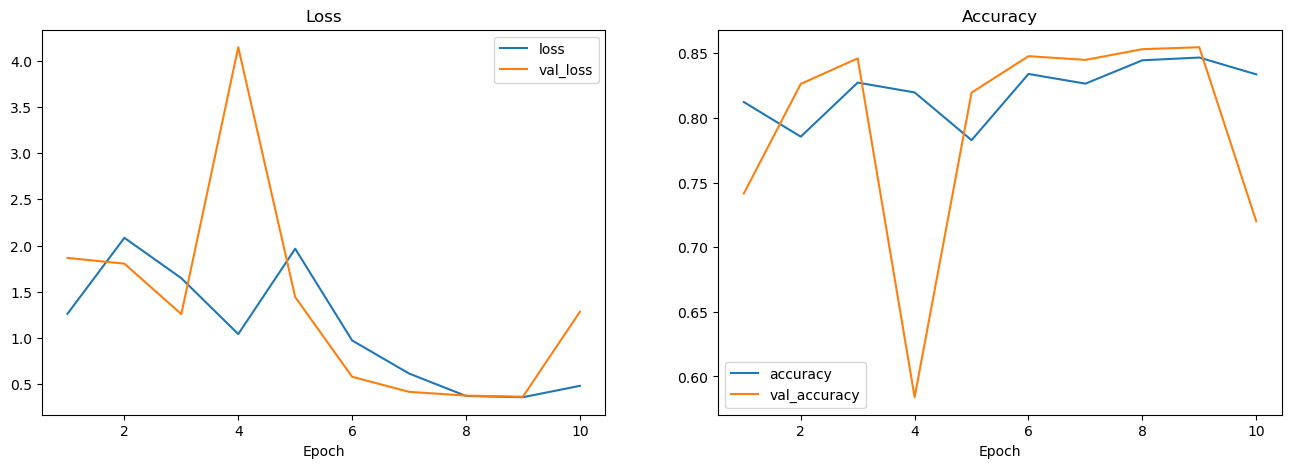

In [54]:
epoch=10

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,1)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0,1)

plt.show()

Terlihat plot dimana model tersebut overfitting.

## Model Improvement

Model improvement menggunakan activation relu dan sigmoid pada model, serta mengganti opimizers menjadi Nadam dengan learning rate 0.01

In [55]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 100 epochs
history = model_1.fit(train_dataset, epochs=50, verbose=1, callbacks = callbacks1, validation_data= val_dataset)

Epoch 1/50
925/925 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8501 - val_loss: 0.2724 - val_accuracy: 0.8613
Epoch 2/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2683 - accuracy: 0.8557 - val_loss: 0.2621 - val_accuracy: 0.8618
Epoch 3/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2584 - accuracy: 0.8641 - val_loss: 0.2493 - val_accuracy: 0.8713
Epoch 4/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2512 - accuracy: 0.8819 - val_loss: 0.2473 - val_accuracy: 0.9000
Epoch 5/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2235 - accuracy: 0.9083 - val_loss: 0.2169 - val_accuracy: 0.9125
Epoch 6/50
925/925 [==============================] - 3s 3ms/step - loss: 0.1958 - accuracy: 0.9190 - val_loss: 0.1976 - val_accuracy: 0.9155
Epoch 7/50
925/925 [==============================] - 3s 3ms/step - loss: 0.1869 - accuracy: 0.9188 - val_loss: 0.1974 - val_accuracy: 0.9137
Epoch 

didapati nilai akurasi sebesar 93.5% dan validasi akurasi 93.3%.

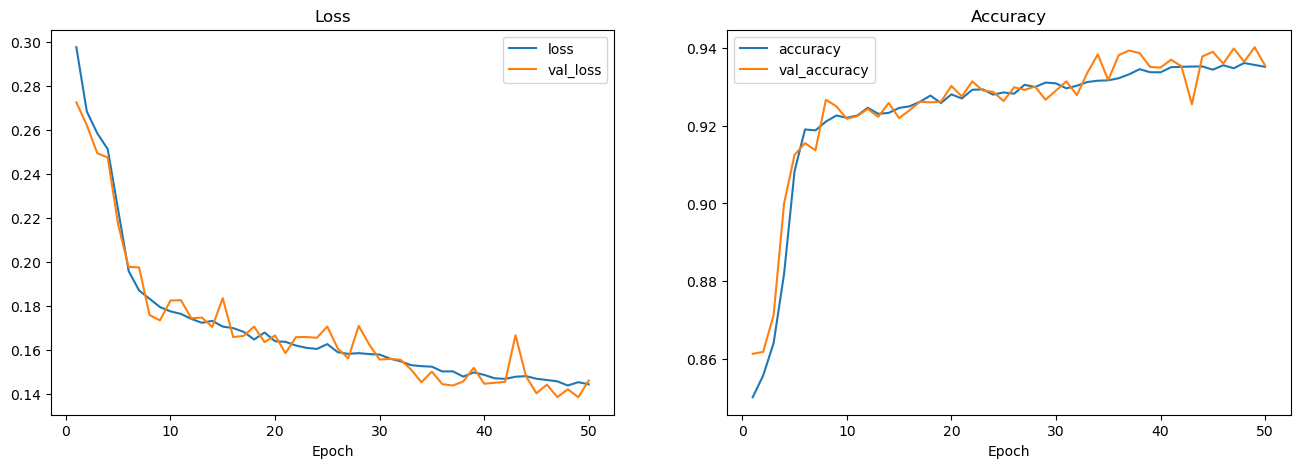

In [56]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,1)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0,1)

plt.show()

Terlihat model good fit.

In [69]:
test_results= model_1.evaluate(test_dataset, verbose=1)
print(f'Test loss: {test_results[0]:.4f}')
print(f'Test Accuracy: {test_results[1]:.4f}')

232/232 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9254
Test loss: 0.2026
Test Accuracy: 0.9254


Setelah dilakukan test akurasi dengan menggunakan test dataset didapatkan nilai yaitu 92% pada data test.

Lalu mencoba menjalankan model dengan menggunakan activation selu pada hidden layer dan sigmoid pada output layer, menggunakan optimizer Adamax dengan learning rate 0.01.

In [70]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="selu"),
  tf.keras.layers.Dense(50, activation="selu"),
  tf.keras.layers.Dense(10, activation="selu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01), 
                metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_dataset, epochs=50, verbose=1, callbacks = callbacks1, validation_data= val_dataset)

Epoch 1/50
925/925 [==============================] - 4s 3ms/step - loss: 0.2872 - accuracy: 0.8471 - val_loss: 0.2548 - val_accuracy: 0.8608
Epoch 2/50
925/925 [==============================] - 2s 3ms/step - loss: 0.2593 - accuracy: 0.8597 - val_loss: 0.2563 - val_accuracy: 0.8681
Epoch 3/50
925/925 [==============================] - 2s 2ms/step - loss: 0.2551 - accuracy: 0.8680 - val_loss: 0.2500 - val_accuracy: 0.8795
Epoch 4/50
925/925 [==============================] - 2s 3ms/step - loss: 0.2385 - accuracy: 0.8937 - val_loss: 0.2227 - val_accuracy: 0.9096
Epoch 5/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2045 - accuracy: 0.9130 - val_loss: 0.2172 - val_accuracy: 0.9088
Epoch 6/50
925/925 [==============================] - 2s 3ms/step - loss: 0.1893 - accuracy: 0.9184 - val_loss: 0.1947 - val_accuracy: 0.9169
Epoch 7/50
925/925 [==============================] - 2s 2ms/step - loss: 0.1864 - accuracy: 0.9192 - val_loss: 0.1757 - val_accuracy: 0.9240
Epoch 

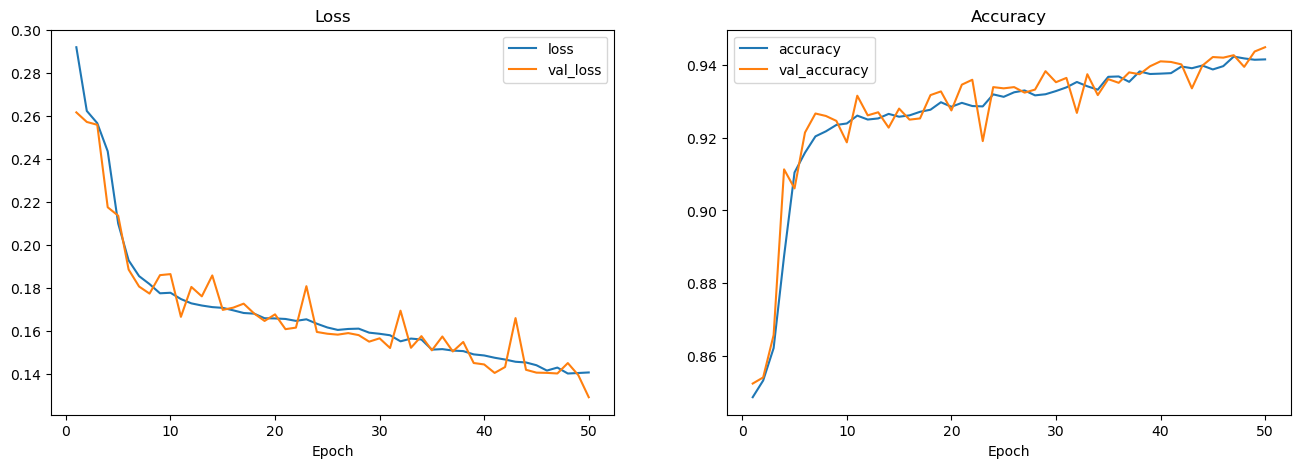

In [59]:
epoch=50
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.5)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.0)

plt.show()

In [60]:
# Check the accuracy of our model
loss, accuracy = model_2.evaluate(test_dataset)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

232/232 [==============================] - 1s 2ms/step - loss: 0.1826 - accuracy: 0.9262
Model loss on test set: 0.1825980693101883
Model accuracy on test set: 92.62%


Didapatkan model yang dicek dengan data test sebesar 92.62%

## Model Functional

Dalam model functional, pengguna harus menentukan input layer dan output layer, serta menentukan layer-layer di antaranya sebagai suatu graf. Setiap layer memiliki satu atau lebih input dan satu atau lebih output. Hal ini memungkinkan pengguna untuk membangun model dengan percabangan dan penggabungan layer, dan juga memungkinkan pengguna untuk menggabungkan input dari beberapa layer dan menghasilkan output yang lebih kompleks.

Model Functional memiliki keuntungan dalam memproses data dengan bentuk yang berbeda atau kompleks, seperti gambar dengan multiple channel, sequence data seperti bahasa alami atau time series, dan data dengan input yang lebih dari satu. Selain itu, pengguna dapat membagi input layer dan output layer untuk membangun model dengan arsitektur yang lebih kompleks seperti model dengan multiple output.

In [61]:
input_lyr = tf.keras.layers.Input(shape=(train_x.shape[1],))
layers = tf.keras.layers.Dense(100)(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(50)(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(10)(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
output = tf.keras.layers.Dense(1)(layers)

model_4 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')
history = model_4.fit(train_dataset, epochs=50, verbose=1, callbacks = callbacks1, validation_data= val_dataset)

Epoch 1/50
925/925 [==============================] - 6s 4ms/step - loss: 1.6724 - accuracy: 0.7809 - val_loss: 1.0485 - val_accuracy: 0.8341
Epoch 2/50
925/925 [==============================] - 3s 3ms/step - loss: 0.5797 - accuracy: 0.8298 - val_loss: 0.3646 - val_accuracy: 0.8594
Epoch 3/50
925/925 [==============================] - 3s 4ms/step - loss: 0.3779 - accuracy: 0.8452 - val_loss: 0.3675 - val_accuracy: 0.8547
Epoch 4/50
925/925 [==============================] - 3s 3ms/step - loss: 0.3767 - accuracy: 0.8512 - val_loss: 0.3641 - val_accuracy: 0.8549
Epoch 5/50
925/925 [==============================] - 3s 3ms/step - loss: 0.3746 - accuracy: 0.8486 - val_loss: 0.3628 - val_accuracy: 0.8547
Epoch 6/50
925/925 [==============================] - 3s 3ms/step - loss: 0.3948 - accuracy: 0.8428 - val_loss: 0.3578 - val_accuracy: 0.8552
Epoch 7/50
925/925 [==============================] - 3s 3ms/step - loss: 0.3797 - accuracy: 0.8457 - val_loss: 0.3562 - val_accuracy: 0.8539
Epoch 

Didapatkan nilai akurasi 84% dan akurasi pada data validasi dengan 85%.

In [62]:
# Check the accuracy of our model
loss, accuracy = model_4.evaluate(test_dataset)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

232/232 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8490
Model loss on test set: 0.3637504577636719
Model accuracy on test set: 84.90%


Didapatkan nilai test sebesar 85%

In [63]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_10 (Dense)            (None, 100)               3900      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                510   

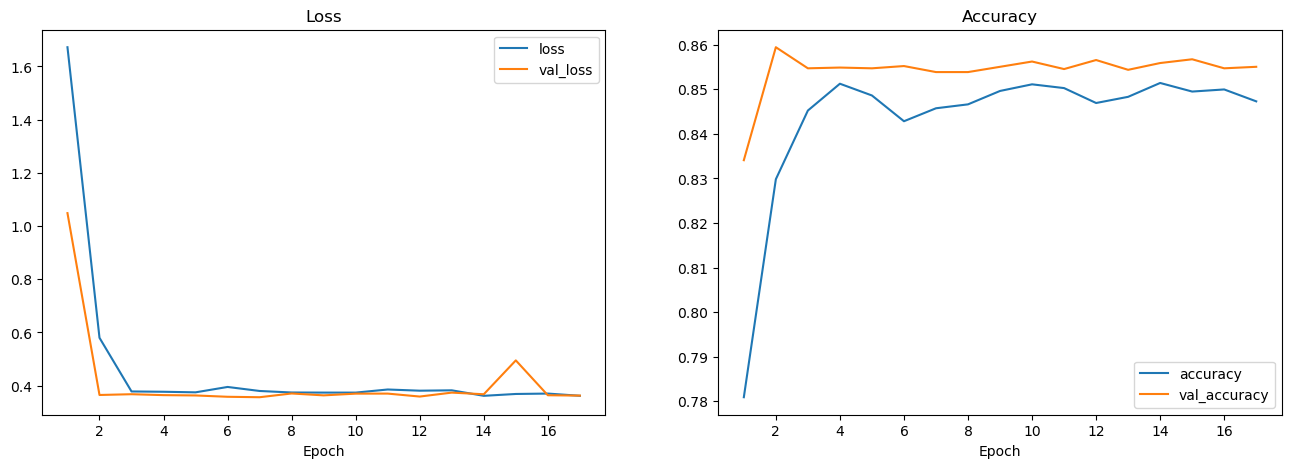

In [67]:
epoch=17

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0.1,0.4)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.8,1.0)

plt.show()

Berdasarkan plot diatas bahwa nilai akurasi lebih kecil daripada nilai validasi. 

## Model Improvement

Improvement dengan menggunakan aktifasi selu pada hidden layer, sigmoid pada output, optimizer yaitu adamax dengan learning rate 0.01

In [71]:
#Functional
input_lyr = tf.keras.layers.Input(shape=(train_x.shape[1],))
layers = tf.keras.layers.Dense(100, activation='selu')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(50,activation='selu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(10,activation='selu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
output = tf.keras.layers.Dense(1,activation='sigmoid')(layers)

model_3 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_3.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),metrics='accuracy')
history = model_3.fit(train_dataset, epochs=50, verbose=1, callbacks = callbacks1, validation_data= val_dataset)

Epoch 1/50
925/925 [==============================] - 6s 4ms/step - loss: 0.3158 - accuracy: 0.8479 - val_loss: 0.2714 - val_accuracy: 0.8544
Epoch 2/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2915 - accuracy: 0.8546 - val_loss: 0.2572 - val_accuracy: 0.8751
Epoch 3/50
925/925 [==============================] - 3s 4ms/step - loss: 0.2738 - accuracy: 0.8785 - val_loss: 0.2238 - val_accuracy: 0.9218
Epoch 4/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2367 - accuracy: 0.9043 - val_loss: 0.1924 - val_accuracy: 0.9213
Epoch 5/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2184 - accuracy: 0.9104 - val_loss: 0.2037 - val_accuracy: 0.9116
Epoch 6/50
925/925 [==============================] - 3s 4ms/step - loss: 0.2115 - accuracy: 0.9124 - val_loss: 0.2022 - val_accuracy: 0.9176
Epoch 7/50
925/925 [==============================] - 3s 3ms/step - loss: 0.2080 - accuracy: 0.9135 - val_loss: 0.1875 - val_accuracy: 0.9211
Epoch 

Didapati nilai akurasi pada data train adalah sebesar 93% dan pada data validasi sebesar 93.7%

In [72]:
# Check the accuracy of our model
loss, accuracy = model_3.evaluate(test_dataset)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

232/232 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9272
Model loss on test set: 0.17043104767799377
Model accuracy on test set: 92.72%


Didapati nilai akurasi pada data test adalah sebesar 92.7%

In [73]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_22 (Dense)            (None, 100)               3900      
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_7 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 10)                510 

# Best Model Evaluation and Prediction Test

Berdasarkan training model ANN sekuens dan fungsional maka didapatkan nilai terbaik yaitu pada model 3

232/232 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9272
Model loss on test set: 0.17043104767799377
Model accuracy on test set: 92.72%


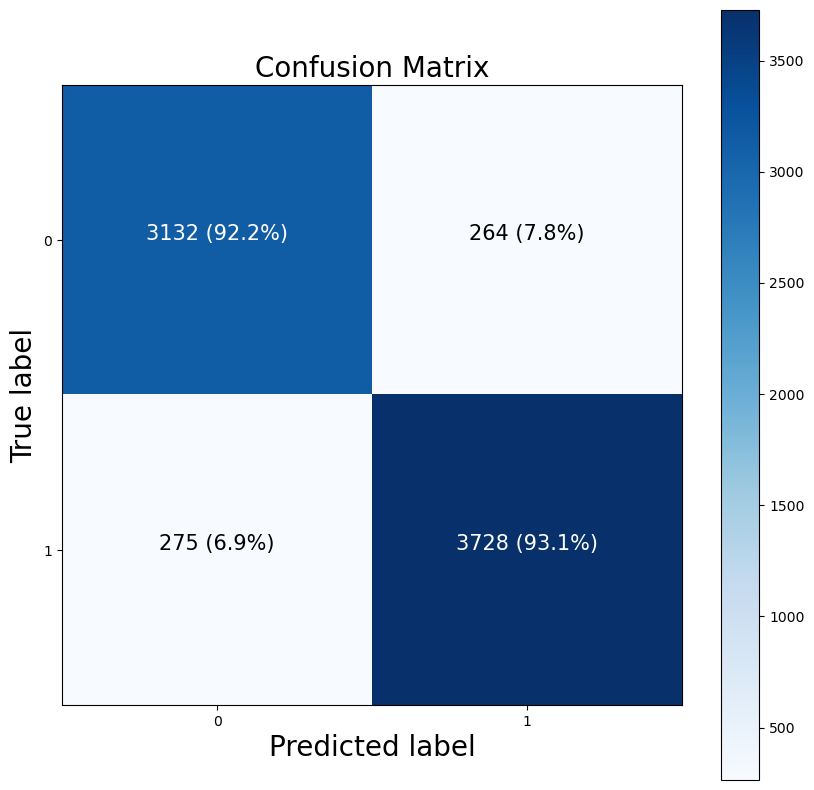

In [74]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

figsize = (10, 10)
# Make predictions
y_preds = model_3.predict(test_x)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
# Check the accuracy of our model
loss, accuracy = model_3.evaluate(test_dataset)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

Karena dalam kasus ini label 1 (negatif) = churn , sedangkan label 0 (positif) = tidak churn. Maka:
- FN adalah ketika terprediksi negatif ( 0 = tidak Churn) tapi kenyataannya churn
- FP adalah  ketika terprediksi positif ( 1 = churn) tapi kenyataannya tidak churn

sklearn metrics defaultnya menggunakan 1 sebagai positive class.
Berarti seharusnya kita fokus ke recall

In [75]:
# define the preprocessing steps for categorical and numerical columns
num_transformer1 = Pipeline([
                    ('wins1', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
                    ('scaling1', StandardScaler())
                    ])
num_transformer2 = Pipeline([
                    ('wins2', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
                    ('scaling2', MinMaxScaler())
                    ])
num_transformer3 = Pipeline([
                    ('wins3', Winsorizer(capping_method='iqr', tail='both', fold=3)),
                    ('scaling3', MinMaxScaler())
                    ])
cat_transformer1 = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[['M', 'F'], ['No Membership', 'Basic Membership','Silver Membership','Gold Membership','Premium Membership','Platinum Membership'],['No','Yes'],['No','Yes'],['No','Yes'],['No','Yes']]))
    ])
cat_transformer2 = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])
# create the column transformer to apply the preprocessing steps to the data
full_pipeline = ColumnTransformer([
        ("num1", num_transformer1, ['age','days_since_last_login','avg_frequency_login_days']),
        ("num2", num_transformer2, ['points_in_wallet']),
        ("num3", num_transformer3, ['avg_time_spent','avg_transaction_value']),
        ("cat_ord", cat_transformer1, ['gender', 'membership_category','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']),
        ("cat_ohe", cat_transformer2, ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']),
    ])

# create the pipeline
final_pipeline = Pipeline([
    ("full_pipeline", full_pipeline),
    ("best_model", model_3)
])

final_pipeline.fit(x_train_full, y_train_full)
hasil = final_pipeline.predict(x_test)
hasil_akhir = np.round(hasil)
hasil_akhir

232/232 [==============================] - 1s 3ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [76]:
from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(y_test,hasil_akhir))
print('AUC:',roc_auc_score(y_test,hasil))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3396
           1       0.95      0.91      0.93      4003

    accuracy                           0.92      7399
   macro avg       0.92      0.93      0.92      7399
weighted avg       0.93      0.92      0.92      7399

AUC: 0.9752279430003469


# Model Saving

Untuk melakukan saving pada model, cukup import joblib dan gunakan joblib.dump(nama variabel,'nama file.pkl'). Untuk dapat melakukan modelling pada notebook/file yang berbeda, kita akan ngesave model,scaling, dan encoder yang sudah di fit.

In [77]:
joblib.dump(num_transformer1,'num_pipeline_gaus.pkl')
joblib.dump(num_transformer2,'num_pipeline_iqr1.pkl')
joblib.dump(num_transformer3,'num_pipeline_iqr3.pkl')
joblib.dump(cat_transformer1,'cat_transformer_ord.pkl')
joblib.dump(cat_transformer2,'cat_transformer_ohe.pkl')
joblib.dump(full_pipeline,'full_pipeline.pkl')
model_3.save('best_model.h5')
joblib.dump(final_pipeline,'final_pipeline.pkl')

['final_pipeline.pkl']

# Model Inference

Dilakukan di Notebook terpisah

# Conclusion

## Model Analysis

Model ANN Training menggunakan Sequential API dan Functional API. 

pada Sequential API didapati bahwa model yang tidak dilakukan hyperparameter tuning atau pada default state, didapati nilai yang cukup baik namun overfit, sama halnya dengan Functional API yang didapati nilai baik namun overfit.

Setelah dilakukan Hyperparameter Tuning dengan menggunakan beberapa parameter seperti Epoch, Learning rate, Optimizer, dan Activation pada hidden layer serta menambah hidden layer, berhasil meningkatkan akurasi dari model yang sangat signifikan.

Setelah dilakukan Hyperparameter Tuning didapatkan model terbaik yaitu model_3 dengan nilai akurasi pada data test sebesar 92%.

## Overall Analysis

Dapat disimpulkan bahwa dengan model yang telah dibuat yang memiliki nilai akurasi 92% dapat memprediksi customer yang keluar berdasarkan kriteria dan informasi pribadi pada dataset ini, sehingga dapat meminimalisir customer yang churn.